In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics as stat


In [3]:

edu_PartialHighSchool=[30000,10000,10000,20000,70000,10000,20000,10000,30000]
edu_HighSchool=[20000,30000,60000,20000,40000,60000,60000]
edu_PartialCollege=[600000,140000,130000,130000,60000,40000]
edu_Bachelors=[40000,20000,90000,120000,60000,130000,20000,100000,80000,30000,10000,120000]
edu_Graduate=[160000,50000,80000,30000,40000,80000,130000,100000,130000,50000,130000]





In [4]:
t,p=stats.ttest_ind(edu_PartialHighSchool,edu_HighSchool) #t тест в результате которого мы также получаем p value 
t,p

(-1.8839207264029945, 0.08051322333702225)

In [5]:
import seaborn as sns

C:\Users\vladt\AppData\Local\Temp\ipykernel_13052\1708758126.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edu_Graduate,label='Graduate')


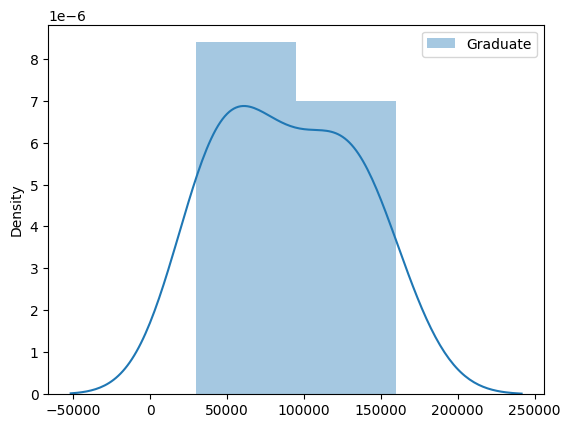

In [31]:

sns.distplot(edu_Graduate,label='Graduate')
#строим графики распределения
plt.legend()



In [33]:
print(stats.f_oneway(edu_Bachelors,edu_Graduate,edu_HighSchool,edu_PartialCollege,edu_PartialHighSchool))
#однофакторного дисперсионного анализа (ANOVA)
""" 
мы сравниваем средние значения всех этих выборок

помогает нам определить существуют ли статистически значимые различия между несколькими группами(t тест применяется только для 2 групп)
"""
#посмотреть что такое f статистика так как это значение 2.29 связано с ним

F_onewayResult(statistic=4.0016701824061345, pvalue=0.008007798915872258)


' \nмы сравниваем средние значения всех этих выборок\n\nпомогает нам определить существуют ли статистически значимые различия между несколькими группами(t тест применяется только для 2 групп)\n\n\n\n'

In [8]:
import pandas as pd

df=pd.read_csv('insurance.csv')
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


<Axes: xlabel='charges', ylabel='Count'>

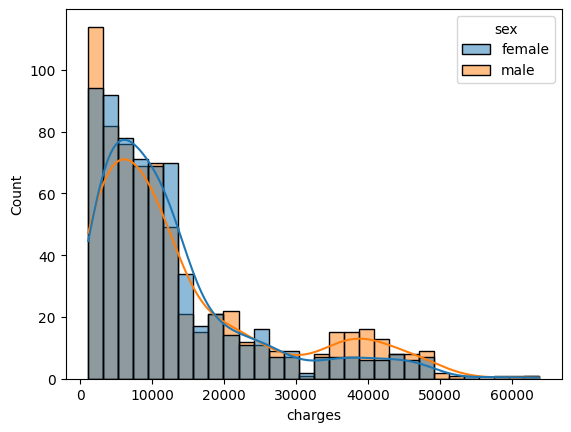

In [9]:
sns.histplot(data=df,x='charges',hue='sex',kde=True) #hue чтобы разделить по какому-то
#категориальному признаку

<Axes: xlabel='charges', ylabel='Count'>

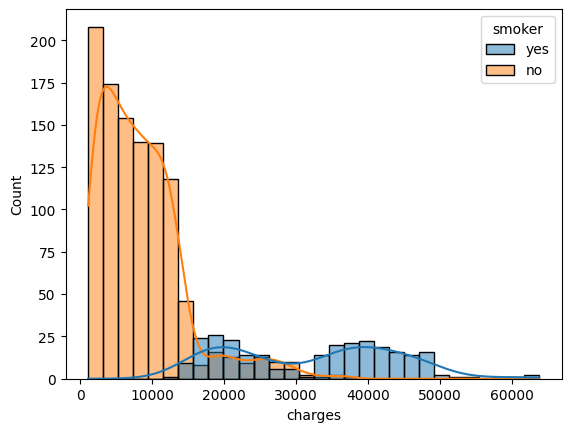

In [10]:
sns.histplot(data=df,x='charges',hue='smoker',kde=True)

In [11]:
smoker_y=df[df['smoker']=='yes']
smoker_n=df[df['smoker']=='no']

In [12]:
stats.ttest_ind(smoker_y['charges'],smoker_n['charges'])



TtestResult(statistic=46.66492117272371, pvalue=8.271435842179102e-283, df=1336.0)

In [13]:

""" 
feature='smoker' #тут можно любую категориальную переменную
label='charges'


groups=df[feature].unique()
grouped_values=[]

for group in groups:
    #print(df[df[feature]==group][label]) - получаем 2 выборки с charges для курящих и не курящих
    grouped_values.append(df[df[feature]==group][label])
    

stats.f_oneway(*grouped_values) #короче каждый из обьектов в grouped_values(2) мы помещаем туда
 """

def CompareGroups(feature,label):
    groups=df[feature].unique()
    grouped_values=[]
    for group in groups:
        grouped_values.append(df[df[feature]==group][label])
    print(stats.f_oneway(*grouped_values))


CompareGroups('smoker','charges')


F_onewayResult(statistic=2177.614868056519, pvalue=8.271435842182967e-283)


In [14]:
df=pd.read_csv('bikebuyer1.csv')
df.head(2)

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes


In [15]:
df.Education.unique()
df['Education_rank']=df['Education']


In [16]:
df.Education_rank.replace(['Partial High School','High School','Partial College','Bachelors','Graduate Degree'],[1,2,3,4,5],inplace=True)


In [17]:
df['Commute_rank']=df['Commute Distance']
df.head(2)


,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer,Education_rank,Commute_rank
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes,3,1.0
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes,5,1.0


(1932, 15)

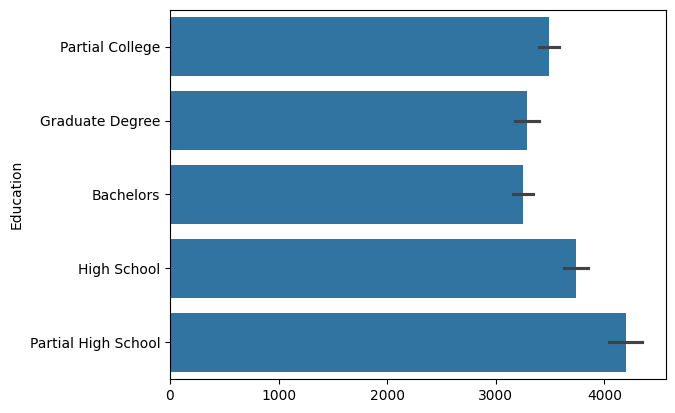

In [18]:
sns.barplot(df['Education']) #что это отражает
(df[df['Education']=='Partial College']).shape

<Axes: xlabel='Education', ylabel='Children'>

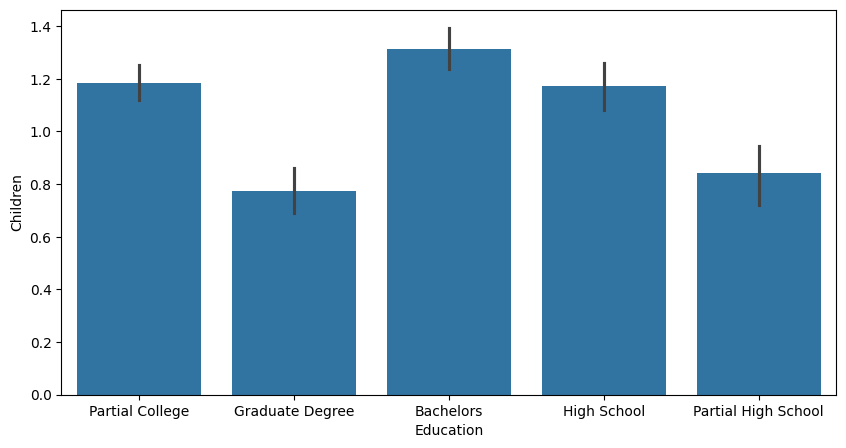

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Education',y='Children')
#ебать что за хуйня
#потом посмотреть что значит

C:\Users\vladt\AppData\Local\Temp\ipykernel_13052\2108485607.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(),rotation=20)


[Text(0, 0, 'Partial College'),
 Text(1, 0, 'Graduate Degree'),
 Text(2, 0, 'Bachelors'),
 Text(3, 0, 'High School'),
 Text(4, 0, 'Partial High School')]

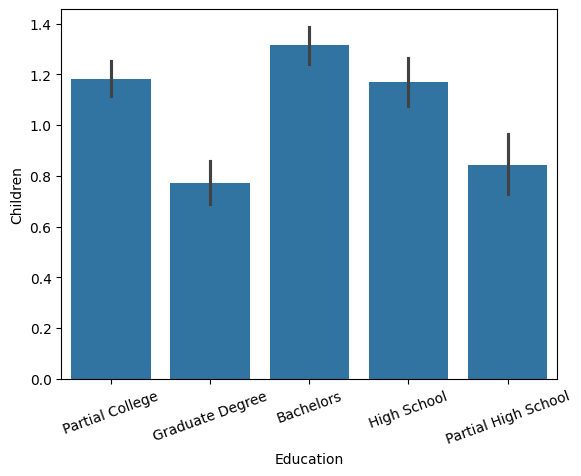

In [20]:
viz=sns.barplot(data=df,x='Education',y='Children')
viz.set_xticklabels(viz.get_xticklabels(),rotation=20)

C:\Users\vladt\AppData\Local\Temp\ipykernel_13052\3619909985.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(),rotation=20)


[Text(0, 0, 'Partial College'),
 Text(1, 0, 'Graduate Degree'),
 Text(2, 0, 'Bachelors'),
 Text(3, 0, 'High School'),
 Text(4, 0, 'Partial High School')]

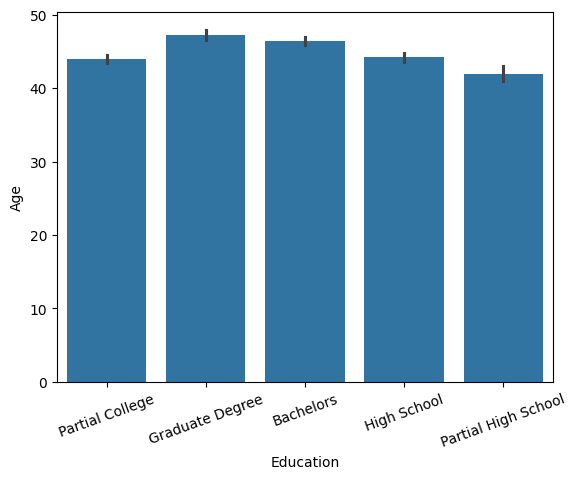

In [21]:
viz=sns.barplot(data=df,x='Education',y='Age') #еще про estimator and ci and hue and col and kind parameters
viz.set_xticklabels(viz.get_xticklabels(),rotation=20)

c:\Users\vladt\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


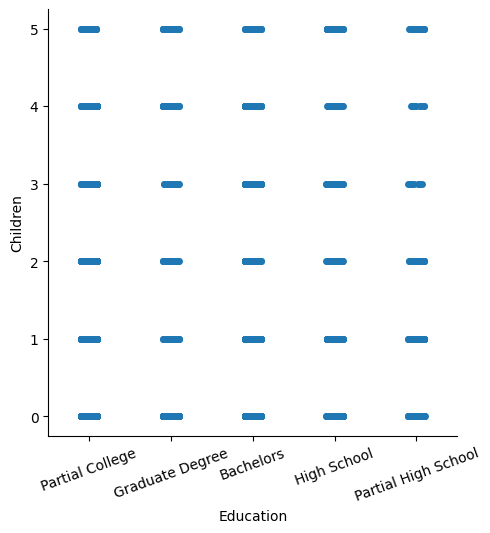

In [22]:
viz=sns.catplot(data=df,x='Education',y='Children') #посмотреть потом что это
viz.set_xticklabels(rotation=20)

In [23]:
""" посмотреть plt.bar, sns.set_context,sns.despine """

' посмотреть plt.bar, sns.set_context,sns.despine '

In [24]:
r,p=stats.pearsonr(df['Education_rank'],df['Age']) #посмотреть что это
r,p

(0.1295651577750534, 1.4070277539617766e-27)

In [25]:
from statsmodels.stats.multicomp import MultiComparison

mc=MultiComparison(df['Education'],df['Yearly Income'])
mc.tukeyhsd() #КОРОЧЕ ПОСМОТРЕТЬ

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'